# Introduction to Programmatic Business Analytics Assignment
Utilizing the Bike Sharing Dataset from the UCI Machine Learning Repository, demonstrate your data science and machine learning skills to extract insights and predict bike rental demand. The dataset can be accessed directly via the provided URL and code.

In the cell below, we'll import all the packages needed for this assignment. 

*Make sure you run this cell before proceeding with the rest of the notebook to avoid any import-related errors.*

In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Task 1: Data Wrangling and Exploration
### 1.1 Load the Dataset
Use the provided code to download and extract the dataset directly from the given URL into a pandas DataFrame.

In [2]:
# Download and extract the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
zip_file = requests.get(url)
zip_file = ZipFile(BytesIO(zip_file.content))
bike_data = pd.read_csv(zip_file.open('day.csv'))

### 1.2 Initial Inspection and Cleaning
Perform an initial inspection by methods like head, info, shape to understand the dataset's structure and content.
Check for missing values and handle them appropriately, if any.

In [3]:
# Inspection of the data
print("First 5 rows of dataframe:")
print(bike_data.head(5))

print("\nInformation about the dataframe:")
print(bike_data.info())

print("\nShape of the dataframe:")
print(bike_data.shape)

print("\nMissing values in the dataframe:")
print(bike_data.isnull().sum())

First 5 rows of dataframe:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

### 1.3 data preparation
- 1.3.1 Convert dteday to a datetime object.
- 1.3.2 Extract year, month, day and daysofweek from dteday and add them as seperate columns to the dataframe.
- 1.3.3 Normalize the temp, atemp, hum, and windspeed features using MinMaxScaler
- 1.3.4 Encode the season, yr, mnth, holiday, weekday, workingday, and weathersit columns as categorical variables.
- 1.3.5 Check the data after the transformation

In [4]:
# 1.3.1 Convert dteday to a datetime object
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

# 1.3.2 Extract year, month, day and daysofweek from dteday and add them as seperate columns to the dataframe.
bike_data['year'] = bike_data['dteday'].dt.year
bike_data['month'] = bike_data['dteday'].dt.month
bike_data['day'] = bike_data['dteday'].dt.day
bike_data['dayofweek'] = bike_data['dteday'].dt.dayofweek

# 1.3.3 Normalize the temp, atemp, hum, and windspeed features using MinMaxScaler
scaler = MinMaxScaler()
features_to_normalize = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[features_to_normalize] = scaler.fit_transform(bike_data[features_to_normalize])

# 1.3.4 Encode the season, yr, mnth, holiday, weekday, workingday, and weathersit columns as categorical variables.
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_data[categorical_columns] = bike_data[categorical_columns].astype('category')

# 1.3.5 Check the data after the transformation
print("First 5 rows of dataframe:")
print(bike_data.head(5))

First 5 rows of dataframe:
   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  year  \
0  0.355170  0.373517  0.828620   0.284606     331         654   985  2011   
1  0.379232  0.360541  0.715771   0.466215     131         670   801  2011   
2  0.171000  0.144830  0.449638   0.465740     120        1229  1349  2011   
3  0.175530  0.174649  0.607131   0.284297     108        1454  1562  2011   
4  0.209120  0.197158  0.449313   0.339143      82        1518  1600  2011   

   month  day  dayofweek  
0      1

### 1.4 visualizing the distribution of bike rentals (cnt) across different time granularities and categorical variables.
Conduct a comprehensive exploratory data analysis on the dataset, focusing on the distribution of bike rentals (cnt) across various dimensions and conditions. The analysis should reveal how bike rentals vary over different months, days of the week, seasons, holidays, working days, and weather situations.

The analysis should utilize Seaborn for creating visualizations, and these should be organized into a multi-panel figure using Matplotlib's subplot functionality. Each subplot is to represent a different aspect of the data:
1. Total bike rentals per month - Presented as a bar plot.
2. Total bike rentals per day of the week - Presented as a bar plot.
3. Bike rentals distribution per season - Displayed using a box plot.
4. Bike rentals on holidays vs. non-holidays - Illustrated with a box plot.
5. Bike rentals on working days vs. non-working days - Visualized through a box plot.
6. Bike rentals across different weather situations - Depicted with a box plot.

All plots should be appropriately titled and laid out for readability and visual appeal. Additionally, a consistent white grid style should be applied to all plots for uniformity

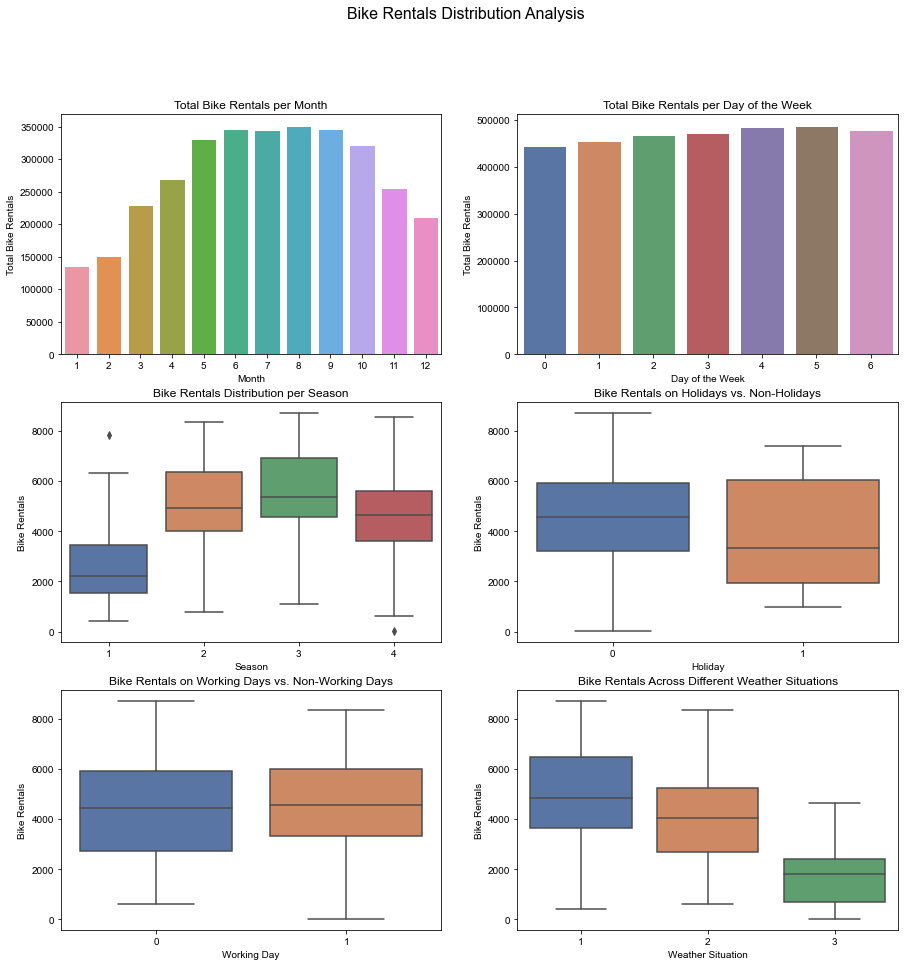

In [5]:
# Visualization of Distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Bike Rentals Distribution Analysis', fontsize=16)
sns.set(style="darkgrid")

# 1. Total bike rentals per month - Presented as a bar plot.
sns.barplot(x='month', y='cnt', data=bike_data.groupby('month')['cnt'].sum().reset_index(), ax=axes[0, 0])
axes[0, 0].set_title('Total Bike Rentals per Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Bike Rentals')

# 2. Total bike rentals per day of the week - Presented as a bar plot.
sns.barplot(x='weekday', y='cnt', data=bike_data.groupby('weekday')['cnt'].sum().reset_index(), ax=axes[0, 1])
axes[0, 1].set_title('Total Bike Rentals per Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_ylabel('Total Bike Rentals')

# 3. Bike rentals distribution per season - Displayed using a box plot.
sns.boxplot(x='season', y='cnt', data=bike_data, ax=axes[1, 0])
axes[1, 0].set_title('Bike Rentals Distribution per Season')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Bike Rentals')

# 4.Bike rentals on holidays vs. non-holidays - Illustrated with a box plot.
sns.boxplot(x='holiday', y='cnt', data=bike_data, ax=axes[1, 1])
axes[1, 1].set_title('Bike Rentals on Holidays vs. Non-Holidays')
axes[1, 1].set_xlabel('Holiday')
axes[1, 1].set_ylabel('Bike Rentals')

# 5. Bike rentals on working days vs. non-working days - Visualized through a box plot.
sns.boxplot(x='workingday', y='cnt', data=bike_data, ax=axes[2, 0])
axes[2, 0].set_title('Bike Rentals on Working Days vs. Non-Working Days')
axes[2, 0].set_xlabel('Working Day')
axes[2, 0].set_ylabel('Bike Rentals')

# 6.Bike rentals across different weather situations - Depicted with a box plot.
sns.boxplot(x='weathersit', y='cnt', data=bike_data, ax=axes[2, 1])
axes[2, 1].set_title('Bike Rentals Across Different Weather Situations')
axes[2, 1].set_xlabel('Weather Situation')
axes[2, 1].set_ylabel('Bike Rentals')
plt.show()

## Task 2: Statistical Analysis and Predictive Modeling

### 2.1 Descriptive and Inferential Statistical Analysis
Perform a detailed statistical analysis on a subset of features from the Bike Sharing dataset. The focus should be on understanding the relationships and characteristics of key numerical variables, including temperature (temp), feeling temperature (atemp), humidity (hum), wind speed (windspeed), and total bike rentals (cnt).

The following steps should be taken in the analysis:

1. Feature Selection: Extract a subset of the dataset containing only the columns temp, atemp, hum, windspeed, and cnt.
2. Descriptive Statistics: Generate the descriptive statistics (such as mean, median, standard deviation, etc.) for these selected features. This will provide an overview of the central tendency and spread of the data.
3. Inferential Statistics: Compute the correlation matrix for the selected features. This step is essential to understand how these variables are related to each other.
4. Visualization of Correlations: Use a heatmap to visualize the correlation matrix. The heatmap should be annotated and utilize a color scheme that clearly indicates the strength and direction of correlations.

All analyses and visualizations should be done with attention to detail, ensuring that the outputs are not only accurate but also easy to interpret. The heatmap, in particular, should be sized appropriately for clarity and aesthetic appeal.

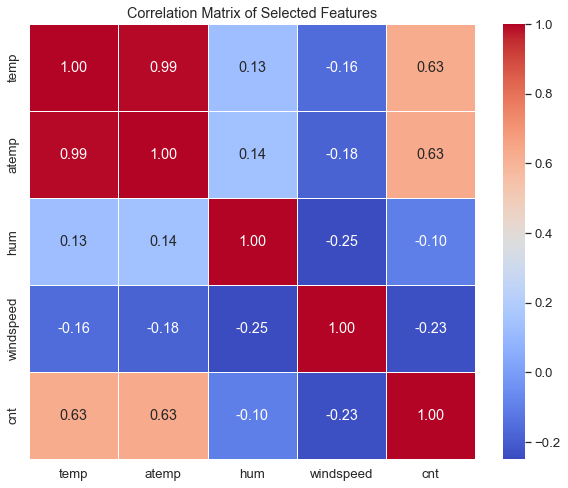


Descriptive Statistics for Selected Features:
             temp       atemp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.543594    0.518864    0.645649    0.346536  4504.348837
std      0.228091    0.213909    0.146457    0.159766  1937.211452
min      0.000000    0.000000    0.000000    0.000000    22.000000
25%      0.346343    0.339674    0.534704    0.232045  3152.000000
50%      0.547268    0.535113    0.644388    0.326928  4548.000000
75%      0.743002    0.695083    0.750857    0.434622  5956.000000
max      1.000000    1.000000    1.000000    1.000000  8714.000000


In [6]:
# Feature Selection
selected_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
selected_data = bike_data[selected_features]

# Descriptive Statistics
descriptive_stats = selected_data.describe()

# Inferential Statistics: Correlation matrix
correlation_matrix = selected_data.corr()

# Visualization of Correlations: Use of heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Display Descriptive Statistics
print("\nDescriptive Statistics for Selected Features:")
print(descriptive_stats)

### 2.2 Development and Evaluation of a Linear Regression Model
Execute a comprehensive regression analysis on the Bike Sharing dataset to predict bike rental counts (cnt). This task involves selecting relevant features, preparing the data, training a linear regression model, making predictions, and evaluating the model's performance.

The detailed steps to be followed in this task are:

1. Feature Selection: Choose appropriate predictor variables for the regression model. These should include season, yr (year), mnth (month), holiday, weekday, workingday, weathersit, temp (temperature), atemp (feeling temperature), hum (humidity), and windspeed.
2. Data Preparation: Prepare the dataset for training and testing. Assign the selected features to X and the target variable, bike rental counts (cnt), to y. Then, split the dataset into training and testing sets using an 80-20 split ratio and a set random state for reproducibility.
3. Model Training: Utilize the Linear Regression algorithm from the scikit-learn library to train the model on the training data.
4. Making Predictions: Use the trained model to make predictions on the test dataset.
5. Model Evaluation: Evaluate the model's performance by calculating key metrics such as the R^2 Score and Root Mean Squared Error (RMSE). The R^2 Score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables, while RMSE provides a measure of the differences between values predicted by the model and the values actually observed.
The outcome of this task should be a well-trained Linear Regression model, along with a thorough evaluation of its predictive performance. All steps should be clearly documented, and findings should be reported with insights drawn from the performance metrics.

Linear Regression Model Performance:
R^2 Score: 0.8276670090367211
Root Mean Squared Error (RMSE): 831.2851545662688

Coefficients:
       Feature  Coefficient
0       season   524.722536
1           yr  2023.997547
2         mnth   -38.444658
3      holiday  -391.550766
4      weekday    72.937003
5   workingday   160.804892
6   weathersit  -632.856284
7         temp  1683.118147
8        atemp  2657.282617
9          hum  -841.639835
10   windspeed -1009.210434


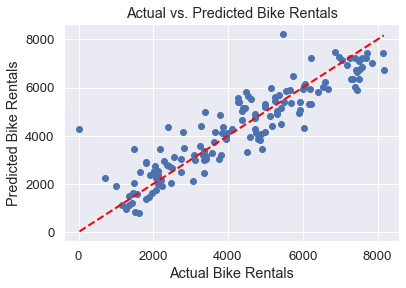

In [7]:
# Feature Selection
selected_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = bike_data[selected_features]
y = bike_data['cnt']

# Data Preparation: Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making Predictions: Predictions on the test dataset
y_pred = model.predict(X_test)

# Model Evaluation: Evaluate RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Displaying the results
print("Linear Regression Model Performance:")
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# Insights and Additional Analysis
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Regression Line')
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs. Predicted Bike Rentals")
plt.show()

### 2.3 Clustering Analysis
Conduct a clustering analysis on the Bike Sharing dataset to uncover patterns and groupings within the environmental variables. The focus will be on the temperature (temp), feeling temperature (atemp), humidity (hum), and wind speed (windspeed) variables. This task involves several key steps, utilizing the KMeans clustering algorithm and evaluating the optimal number of clusters.

The analysis should proceed as follows:

1. *Feature Selection and Preparation:* Isolate the temp, atemp, hum, and windspeed features for clustering.
2. *Data Standardization:* Apply standard scaling to the selected features to normalize their range and variance, ensuring that each feature contributes equally to the clustering process.
3. *Determining Optimal Clusters:* Implement the silhouette method to find the optimal number of clusters. This involves running the KMeans algorithm with a varying number of clusters (from 2 to 10) and calculating the silhouette score for each. The silhouette score measures how similar an object is to its own cluster compared to other clusters.
4. *Silhouette Score Visualization:* Plot the silhouette scores against the number of clusters to visually determine the optimal cluster count.
5. *KMeans Clustering:* Perform KMeans clustering on the standardized data using the optimal number of clusters identified from the silhouette analysis.
6. *Integration with Original Data:* Append the cluster labels derived from KMeans to the original dataset, enabling further analysis based on the identified clusters.
The expected outcome is a well-defined set of clusters, each representing a unique combination of environmental conditions. The analysis should be presented with clear visualizations, particularly for the silhouette score plot, and detailed explanations of each step and its significance in the overall clustering process.

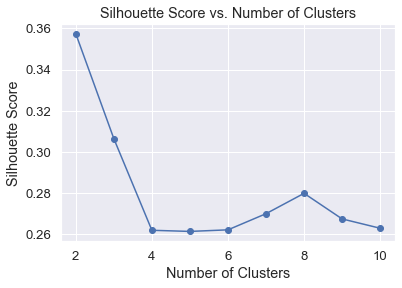

In [8]:
# Feature Selection and Preparation: Isolate the selected features
selected_features = ['temp', 'atemp', 'hum', 'windspeed']
X = bike_data[selected_features]

# Data Standardization: Apply standard scaling to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining Optimal Clusters: Implement the silhouette method
silhouette_scores = []
cluster_range = range(2, 11)  # Trying clusters from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette Score Visualization: Plot silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
# Determine the optimal number: After 4 cluster the improvement in score is small however 3 is considered after the evaluation of PCA visualization.
optimal_clusters = 3

# KMeans Clustering: Perform KMeans clustering on the standardized data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
bike_data['cluster'] = kmeans.fit_predict(X_scaled)

# Integration with Original Data: Append cluster labels to the original dataset
bike_data_with_clusters = pd.concat([bike_data, pd.get_dummies(bike_data['cluster'], prefix='cluster')], axis=1)

# Displaying the results
print(f"Optimal Number of Clusters: {optimal_clusters}")
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_features))

# Additional analysis based on identified clusters
cluster_summary = bike_data_with_clusters.groupby('cluster')[selected_features + ['cnt']].mean()
print("\nCluster Summary:")
print(cluster_summary)

Optimal Number of Clusters: 3

Cluster Centers:
       temp     atemp       hum  windspeed
0  0.332752  0.315729  0.529042   0.448127
1  0.772743  0.731593  0.641287   0.323102
2  0.455124  0.445067  0.783179   0.265452

Cluster Summary:
             temp     atemp       hum  windspeed          cnt
cluster                                                      
0        0.332752  0.315729  0.529042   0.448127  3444.521552
1        0.772743  0.731593  0.641287   0.323102  5808.129693
2        0.455124  0.445067  0.783179   0.265452  3843.533981


### 2.4 Visualizing Clustered Bike Rental Data Using Principal Component Analysis
Perform a dimensionality reduction and visualization on the previously clustered Bike Sharing dataset to better understand the clustering results. This task involves using Principal Component Analysis (PCA) to reduce the data to two dimensions and then creating a scatter plot to visualize the different clusters.

The specific steps to complete this task are:

1. Dimensionality Reduction with PCA: Implement Principal Component Analysis (PCA) to reduce the high-dimensional clustered data to two principal components. This step simplifies the dataset while retaining essential features necessary for understanding the clustering patterns.
2. Visualization of Clusters: After reducing the dimensions, use a scatter plot to visualize the clusters in this new two-dimensional space.
Plot Customization: Assign different colors to each cluster for clarity, label the axes as 'Principal Component 1' and 'Principal Component 2', and include a legend indicating the cluster numbers.
3. Interpretation of Results: Analyze the scatter plot to identify any distinct groupings or patterns that emerge among the clusters. Look for overlaps, distinct separations, or any other notable characteristics in the distribution of the clusters.

This task is aimed at providing a visual representation of the clustering results in a simpler, two-dimensional space, making it easier to interpret and analyze the relationships between different clusters. The outcome should be a clear and informative scatter plot that offers insights into the structure and distribution of the clustered data.

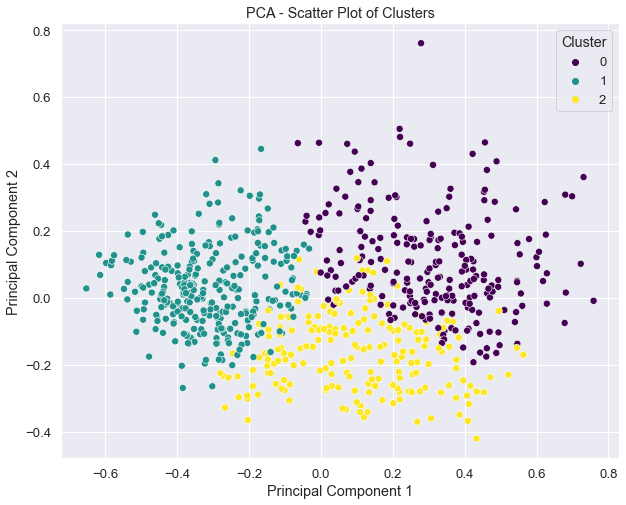

In [10]:
# Extract features and cluster labels
selected_features = ['temp', 'atemp', 'hum', 'windspeed']
X = bike_data_with_clusters[selected_features]
cluster_labels = bike_data_with_clusters['cluster']

# Dimensionality Reduction with PCA: Reduce data to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization of Clusters: Scatter plot of clusters in two-dimensional space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('PCA - Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

## Reflection: 
Provide a brief reflection on what you learned, the challenges you faced, and how you overcame them.